In [1]:
#We want to generate a random set of Geospatial coordinates and get weather info for them:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#We want 500 random coordinates but we will generate 1500 coordinates to account for those that are over water
#Create our set of latitudes and longitudes:
lats = np.random.uniform(-90,90, size = 1500)
lons = np.random.uniform(-180,180, size = 1500)
lat_lons = zip(lats,lons)  #This will create a list of tuples with each tuple have two elements (lat and lon)
lat_lons


In [3]:
coordinates = list(lat_lons)

In [4]:
coordinates

[(70.86042929032538, -146.27277969959547),
 (-3.7445792950219214, -142.30114310536803),
 (-78.14825265489272, 35.74486982537431),
 (58.18559956811032, 66.12127932739156),
 (-7.203077555960874, -104.92248759653422),
 (-73.45349731952024, -54.63987752324063),
 (-79.94364373111733, -117.70478159737817),
 (-61.08697674236222, 132.8765167507073),
 (-77.36408191276135, -120.43972790490552),
 (-9.57759854596027, -87.66944627719239),
 (-33.26242353759889, 49.84023513684673),
 (59.37030136332953, -113.07390376963276),
 (44.14185439420882, 83.67550018925061),
 (-26.767745827833068, -61.5466794299101),
 (53.270739366198654, 142.7865563219433),
 (-3.7499173268499675, -147.57152219807983),
 (85.25898964239707, -160.14971808625933),
 (60.45287072153175, 79.61229205761794),
 (19.652428852232276, 146.29727102090072),
 (-0.4537861695365848, -140.8485497699192),
 (-82.29929518256358, -120.41969891602454),
 (-28.223723892662818, -103.21469063662357),
 (-19.227346055816668, -86.44754736236929),
 (-79.9512

In [ ]:
#Note, see the notebook: API_practice for more detail on what follows below

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [7]:
cities

['fairbanks',
 'atuona',
 'port elizabeth',
 'nizhnyaya tavda',
 'puerto ayora',
 'ushuaia',
 'punta arenas',
 'new norfolk',
 'sechura',
 'taolanaro',
 'hay river',
 'kuytun',
 'presidencia roque saenz pena',
 'tungor',
 'barrow',
 'kargasok',
 'katsuura',
 'pisco',
 'mataura',
 'chagda',
 'albany',
 'aklavik',
 'manjeshwar',
 'hilo',
 'vaini',
 'kavaratti',
 'port alfred',
 'lorengau',
 'margate',
 'requena',
 'qaanaaq',
 'si sa ket',
 'avera',
 'butaritari',
 'hermanus',
 'bethel',
 'rikitea',
 'tasiilaq',
 'cap malheureux',
 'saskylakh',
 'busselton',
 'cape town',
 'jamestown',
 'chokurdakh',
 'sayville',
 'kjollefjord',
 'mount isa',
 'uwayl',
 'tiksi',
 'nikolskoye',
 'avarua',
 'sataua',
 'samusu',
 'noumea',
 'bubaque',
 'port lincoln',
 'warri',
 'vostok',
 'maragogi',
 'east london',
 'mehamn',
 'tsihombe',
 'la asuncion',
 'yumen',
 'brae',
 'alyangula',
 'yellowknife',
 'ilulissat',
 'bluff',
 'plouzane',
 'solnechnyy',
 'raudeberg',
 'upernavik',
 'chuy',
 'waitati',
 'ch

Lets bring this all together:

In [8]:
#Import data time dependencies:
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#We need to create list of cities to query with in the API call:
#Because only 50 queries are allowed per minute we set a 60 second pause after each set of 50 cities
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
#Unfortunately this does work for; See next cell below and the errors that are generated:

Beginning Data Retrieval     
-----------------------------


In [9]:
from config import open_weather_key
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
city_url = url + "&q=" + cities[2]
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=port elizabeth


In [10]:
cities[2]

'port elizabeth'

In [28]:
city_url = url + "&q=" + cities[i]

NameError: name 'i' is not defined

Two issues occured here: cities composed of two words are not concatenated
If we pass cities[i] to the lopp at written, the city index (not the city) is printed causing
an error

In [11]:
#Quick example of the enumerate function which we will utilize to prevent the second error
for i, city in enumerate(cities):
    print(i,city + " " + city)
    
#This is nice alternative to using the for i in range...print(cities[i])

0 fairbanks fairbanks
1 atuona atuona
2 port elizabeth port elizabeth
3 nizhnyaya tavda nizhnyaya tavda
4 puerto ayora puerto ayora
5 ushuaia ushuaia
6 punta arenas punta arenas
7 new norfolk new norfolk
8 sechura sechura
9 taolanaro taolanaro
10 hay river hay river
11 kuytun kuytun
12 presidencia roque saenz pena presidencia roque saenz pena
13 tungor tungor
14 barrow barrow
15 kargasok kargasok
16 katsuura katsuura
17 pisco pisco
18 mataura mataura
19 chagda chagda
20 albany albany
21 aklavik aklavik
22 manjeshwar manjeshwar
23 hilo hilo
24 vaini vaini
25 kavaratti kavaratti
26 port alfred port alfred
27 lorengau lorengau
28 margate margate
29 requena requena
30 qaanaaq qaanaaq
31 si sa ket si sa ket
32 avera avera
33 butaritari butaritari
34 hermanus hermanus
35 bethel bethel
36 rikitea rikitea
37 tasiilaq tasiilaq
38 cap malheureux cap malheureux
39 saskylakh saskylakh
40 busselton busselton
41 cape town cape town
42 jamestown jamestown
43 chokurdakh chokurdakh
44 sayville sayville

In [12]:
#A better way to do this:
# Loop through all the cities in the list.
record_count = 1
set_count = 1
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
       # time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")  #Replaces spaces if city has two or more words and concatenates into a single string
    print(city_url)
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=fairbanks
Processing Record 1 of Set 1 | fairbanks
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=atuona
Processing Record 2 of Set 1 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=port+elizabeth
Processing Record 3 of Set 1 | port elizabeth
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=nizhnyaya+tavda
Processing Record 4 of Set 1 | nizhnyaya tavda
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=puerto+ayora
Processing Record 5 of Set 1 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=ushuaia
Processing Record 6 of Set 1 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=punta+arenas
Processing Record 7 of Set 1 | punta arenas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=&q=new+norfolk
Processing Record 8 of Set 1 | new norf

Notice that the cities with two or more words are all joined by "+" which is the correct syntax to 
query the server. In the above example we haven't imported the time object yet since we are simply
printing the urls and user notifications of which city is being processed for example purposes

Before continuing we must deal with potential errors. We are querying the server with multiple cities and if one of them produces an error, the entire query terminate and we will have to start over after fixing the error. This may result in multiple redundant queries to the server which wastes time, cost money and bandwidth etc.  Therefore, we will embed our query in an error handling block:

In [13]:
import time  
import requests
from datetime import datetime
record_count = 1
set_count = 1
city_data = []
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + open_weather_key + "&q=" + city.replace(" ","+")  #Replaces spaces if city has two or more words and concatenates into a single string
   # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except KeyError:
        print("City not found. Skipping...")
        pass  #'Continue' may also work here

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | fairbanks
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | port elizabeth
Processing Record 4 of Set 1 | nizhnyaya tavda
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | ushuaia
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | new norfolk
Processing Record 9 of Set 1 | sechura
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | hay river
Processing Record 12 of Set 1 | kuytun
Processing Record 13 of Set 1 | presidencia roque saenz pena
Processing Record 14 of Set 1 | tungor
Processing Record 15 of Set 1 | barrow
Processing Record 16 of Set 1 | kargasok
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | pisco
Processing Record 19 of Set 1 | mataura
Processing Record 20 of Set 1 | chagda
City not found. Skipping...
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | aklavik
Processing Record 23 of

Processing Record 35 of Set 4 | amga
Processing Record 36 of Set 4 | hithadhoo
Processing Record 37 of Set 4 | kaitangata
Processing Record 38 of Set 4 | gersthofen
Processing Record 39 of Set 4 | cortez
Processing Record 40 of Set 4 | ponta do sol
Processing Record 41 of Set 4 | kidero
Processing Record 42 of Set 4 | bosobolo
Processing Record 43 of Set 4 | marsaxlokk
Processing Record 44 of Set 4 | pouembout
Processing Record 45 of Set 4 | padang
Processing Record 46 of Set 4 | kavieng
Processing Record 47 of Set 4 | hammerfest
Processing Record 48 of Set 4 | campeche
Processing Record 49 of Set 4 | camrose
Processing Record 50 of Set 4 | bermeo
Processing Record 1 of Set 5 | naze
Processing Record 2 of Set 5 | beroroha
Processing Record 3 of Set 5 | sitka
Processing Record 4 of Set 5 | aksarka
Processing Record 5 of Set 5 | sawtell
Processing Record 6 of Set 5 | seoul
Processing Record 7 of Set 5 | bakchar
Processing Record 8 of Set 5 | tyn nad vltavou
Processing Record 9 of Set 5 |

Processing Record 21 of Set 8 | bathsheba
Processing Record 22 of Set 8 | kalabagh
Processing Record 23 of Set 8 | nador
Processing Record 24 of Set 8 | vakhrushi
Processing Record 25 of Set 8 | muros
Processing Record 26 of Set 8 | chalus
Processing Record 27 of Set 8 | hambantota
Processing Record 28 of Set 8 | gamboula
Processing Record 29 of Set 8 | nurota
Processing Record 30 of Set 8 | vaxjo
Processing Record 31 of Set 8 | am timan
Processing Record 32 of Set 8 | chegdomyn
Processing Record 33 of Set 8 | nouadhibou
Processing Record 34 of Set 8 | hutchinson
Processing Record 35 of Set 8 | tupelo
Processing Record 36 of Set 8 | camopi
Processing Record 37 of Set 8 | mian channun
Processing Record 38 of Set 8 | thompson
Processing Record 39 of Set 8 | cermik
Processing Record 40 of Set 8 | abu samrah
Processing Record 41 of Set 8 | kahului
Processing Record 42 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 43 of Set 8 | bambous virieux
Processing Record 44 of Set

Processing Record 10 of Set 12 | hvide sande
Processing Record 11 of Set 12 | waipawa
Processing Record 12 of Set 12 | nemuro
Processing Record 13 of Set 12 | mufumbwe
Processing Record 14 of Set 12 | praia da vitoria
Processing Record 15 of Set 12 | grand centre
City not found. Skipping...
Processing Record 16 of Set 12 | herat
Processing Record 17 of Set 12 | hobyo
Processing Record 18 of Set 12 | banda aceh
Processing Record 19 of Set 12 | panzhihua
Processing Record 20 of Set 12 | bokspits
City not found. Skipping...
Processing Record 21 of Set 12 | mitu
Processing Record 22 of Set 12 | suifenhe
Processing Record 23 of Set 12 | guerrero negro
Processing Record 24 of Set 12 | srednekolymsk
Processing Record 25 of Set 12 | kiruna
Processing Record 26 of Set 12 | ruatoria
City not found. Skipping...
Processing Record 27 of Set 12 | cockburn town
Processing Record 28 of Set 12 | balabac
Processing Record 29 of Set 12 | xuddur
Processing Record 30 of Set 12 | concepcion
Processing Recor

In [14]:
#Now we convert to a dataframe:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fairbanks,64.8378,-147.7164,35.60,90,90,0.00,US,2021-11-03 21:25:22
1,Atuona,-9.8000,-139.0333,78.03,66,61,12.44,PF,2021-11-03 21:25:22
2,Port Elizabeth,-33.9180,25.5701,55.69,88,0,2.30,ZA,2021-11-03 21:20:51
3,Nizhnyaya Tavda,57.6731,66.1725,20.55,82,100,9.95,RU,2021-11-03 21:25:23
4,Puerto Ayora,-0.7393,-90.3518,80.56,76,83,10.04,EC,2021-11-03 21:25:23
5,Ushuaia,-54.8000,-68.3000,47.86,61,75,24.16,AR,2021-11-03 21:22:05
6,Punta Arenas,-53.1500,-70.9167,53.71,50,0,26.46,CL,2021-11-03 21:25:24
7,New Norfolk,-42.7826,147.0587,58.75,80,6,1.01,AU,2021-11-03 21:25:24
8,Sechura,-5.5569,-80.8222,74.75,56,34,15.46,PE,2021-11-03 21:25:25
9,Hay River,60.8156,-115.7999,48.18,49,75,9.22,CA,2021-11-03 21:25:25


In [15]:
#Lets change the column order:
column_order =["City", "Country", "Date", "Lat", "Lng", 
               "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fairbanks,US,2021-11-03 21:25:22,64.8378,-147.7164,35.60,90,90,0.00
1,Atuona,PF,2021-11-03 21:25:22,-9.8000,-139.0333,78.03,66,61,12.44
2,Port Elizabeth,ZA,2021-11-03 21:20:51,-33.9180,25.5701,55.69,88,0,2.30
3,Nizhnyaya Tavda,RU,2021-11-03 21:25:23,57.6731,66.1725,20.55,82,100,9.95
4,Puerto Ayora,EC,2021-11-03 21:25:23,-0.7393,-90.3518,80.56,76,83,10.04


In [16]:
output_data_file = "weather_data/cities.csv"
city_data_df.to_csv(output_data_file, index_label = "City_ID")

Now we can see how certain parameters such as wind, temperature, and humidity vary with latitude:

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
#We also need the current time:
import time
# Get today's date in seconds.
today = time.time()
today  #Baseline is Jan 1 1970 in seconds
#Example: Roughly Nov 3 2021 3:23pm and 30 seconds = 

1635978119.6190956

In [19]:
#Convert to current date:
time.strftime("%x")

'11/03/21'

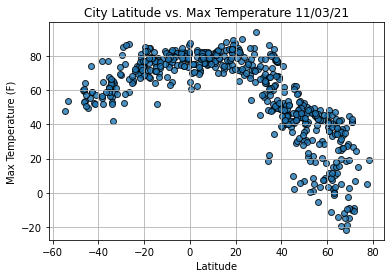

In [20]:
#Now we can plot data and add the current date to the figure title:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

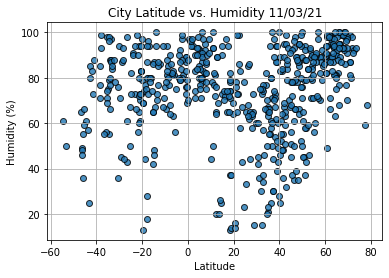

In [21]:
#We can repurpose the above code to get the other parameters of interest:
#Humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

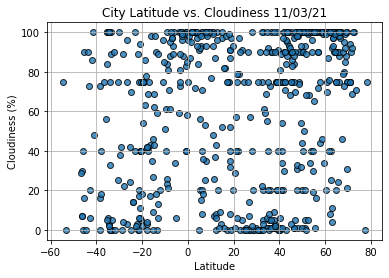

In [24]:
#Cloudiness:
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

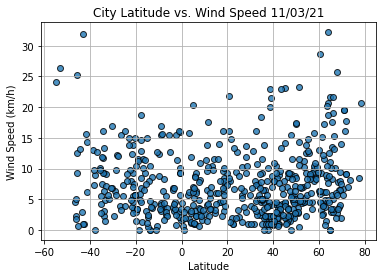

In [25]:
#Windspeed:
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (km/h)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()